In [1]:
import nltk
nltk.download('treebank')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('punkt')


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import nltk
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

**Training a Parts of speech tagger using NLTK tree bank data set**

In [0]:
def sentence_feature(st,ix):
  d_ft = {}
  d_ft['word'] = st[ix]
  d_ft['distance_from_first'] = ix - 0
  d_ft['distance_from_last'] = len(st) - ix
  d_ft['capitalize'] = st[ix][0].upper() == st[ix][0]
  d_ft['prefix1'] = st[ix][0]
  d_ft['prefix2'] = st[ix][:2]
  d_ft['prefix3'] = st[ix][:3]
  d_ft['suffix1'] = st[ix][-1]
  d_ft['suffix2'] = st[ix][-2:]
  d_ft['suffix3'] = st[ix][-3:]
  d_ft['previous_word'] = '' if ix==0 else st[ix-1]
  d_ft['next_word'] = '' if ix == (len(st)-1) else st[ix+1]
  d_ft['numeric']  = st[ix].isdigit()
  
  
  # print(d_ft.items())
  return d_ft  

In [0]:
def get_untagged_sentence(tagged_sentences):
  [s,t] = zip(*tagged_sentences)
  return list(s)

In [5]:
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')
print(len(tagged_sentences))

3914


In [0]:
def ext_features(tg_sents):
  sent,tag = [],[]
  for tg in tg_sents:
    for index in range(len(tg)):
      sent.append(sentence_feature(get_untagged_sentence(tg),index))
      tag.append(tg[index][1])
  return sent,tag


In [0]:
X,y = ext_features(tagged_sentences)


In [8]:
print(X[:5])

[{'word': 'Pierre', 'distance_from_first': 0, 'distance_from_last': 18, 'capitalize': True, 'prefix1': 'P', 'prefix2': 'Pi', 'prefix3': 'Pie', 'suffix1': 'e', 'suffix2': 're', 'suffix3': 'rre', 'previous_word': '', 'next_word': 'Vinken', 'numeric': False}, {'word': 'Vinken', 'distance_from_first': 1, 'distance_from_last': 17, 'capitalize': True, 'prefix1': 'V', 'prefix2': 'Vi', 'prefix3': 'Vin', 'suffix1': 'n', 'suffix2': 'en', 'suffix3': 'ken', 'previous_word': 'Pierre', 'next_word': ',', 'numeric': False}, {'word': ',', 'distance_from_first': 2, 'distance_from_last': 16, 'capitalize': True, 'prefix1': ',', 'prefix2': ',', 'prefix3': ',', 'suffix1': ',', 'suffix2': ',', 'suffix3': ',', 'previous_word': 'Vinken', 'next_word': '61', 'numeric': False}, {'word': '61', 'distance_from_first': 3, 'distance_from_last': 15, 'capitalize': True, 'prefix1': '6', 'prefix2': '61', 'prefix3': '61', 'suffix1': '1', 'suffix2': '61', 'suffix3': '61', 'previous_word': ',', 'next_word': 'years', 'numeric

In [0]:
n_sample = 10000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[:n_sample]

In [0]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(X_transformed[:1,:],'\n',X_transformed[:1,:].shape)
# print(X[1])


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y_sampled,test_size=0.2,random_state=123)

In [12]:
rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
def predict_pos_tags(sentence):
  tagged_sentence = []
  features = [sentence_feature(sentence,index) for index in range(len(sentence))]
  features = dict_vectorizer.transform(features)
  tags = rf.predict(features)
  return zip(sentence,tags)

In [14]:
test_sentence = 'This is a simple POS tagger'
for tagged in predict_pos_tags(test_sentence.split()):
  print(tagged)
# print(predict_pos_tags(test_sentence.split()))

('This', 'DET')
('is', 'VERB')
('a', 'DET')
('simple', 'ADJ')
('POS', 'NOUN')
('tagger', 'NOUN')


In [0]:
predictions = rf.predict(X_test)

In [16]:
accuracy_score(y_test,predictions)

0.9245

In [0]:
cm = confusion_matrix(y_test,predictions)

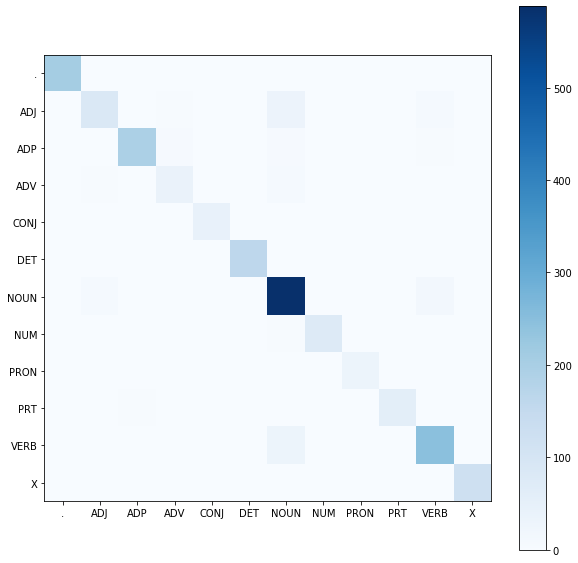

In [18]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(cm,cmap=plt.cm.Blues)
plt.colorbar()

In [19]:
feature_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
sorted_features = sorted(feature_list,key = lambda x:x[1],reverse=True)
print(sorted_features[:20])
# print(len(sorted_features))

[('prefix1=*', 0.0217159529847135), ('capitalize', 0.01942914814914855), ('prefix2=th', 0.01663034881259659), ('prefix3=,', 0.01638916034063961), ('suffix3=the', 0.014796020078517625), ('suffix3=.', 0.013389568218370576), ('suffix2=he', 0.013186873003408723), ('suffix1=d', 0.011747099301799189), ('prefix3=the', 0.010970958072888549), ('suffix1=,', 0.010654251709035733), ('suffix1=s', 0.010142094372125737), ('distance_from_first', 0.010119912092066773), ('word=.', 0.009650665929257759), ('numeric', 0.009473314250658107), ('prefix2=,', 0.009358083259992893), ('distance_from_last', 0.009145033101091663), ('prefix2=.', 0.008897025329875486), ('word=of', 0.008311687799943923), ('prefix2=to', 0.007461294066222072), ('suffix2=-1', 0.006399994554332078)]
